In [5]:
import torch
from torchvision import datasets, transforms


transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [6]:
from torch import nn, optim 
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

In [7]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 20
steps = 10

In [13]:
for e in range(epochs):
    running_loss = 0
    train_losses ,test_losses = [], []
    
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss =0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            for images, labels in trainloader:
                output = model(images)
                test_loss += criterion(output, labels)
                
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(trainloader))
        
        print("epoch: {} / {}".format(e + 1, epochs), 
              "Training Loss: {:.3f}".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}".format(test_loss/len(testloader)),
              "Test Accr:{:.3f}".format(accuracy/len(testloader)))

epoch: 1 / 20 Training Loss: 0.411 Test Loss: 2.078 Test Accr:5.212
epoch: 2 / 20 Training Loss: 0.408 Test Loss: 2.005 Test Accr:5.222
epoch: 3 / 20 Training Loss: 0.394 Test Loss: 1.922 Test Accr:5.258
epoch: 4 / 20 Training Loss: 0.392 Test Loss: 2.035 Test Accr:5.240
epoch: 5 / 20 Training Loss: 0.395 Test Loss: 1.782 Test Accr:5.328
epoch: 6 / 20 Training Loss: 0.382 Test Loss: 1.741 Test Accr:5.332
epoch: 7 / 20 Training Loss: 0.380 Test Loss: 1.818 Test Accr:5.316
epoch: 8 / 20 Training Loss: 0.378 Test Loss: 1.759 Test Accr:5.315
epoch: 9 / 20 Training Loss: 0.376 Test Loss: 1.713 Test Accr:5.368
epoch: 10 / 20 Training Loss: 0.371 Test Loss: 1.745 Test Accr:5.333
epoch: 11 / 20 Training Loss: 0.368 Test Loss: 1.719 Test Accr:5.329
epoch: 12 / 20 Training Loss: 0.367 Test Loss: 1.790 Test Accr:5.317
epoch: 13 / 20 Training Loss: 0.363 Test Loss: 1.861 Test Accr:5.279
epoch: 14 / 20 Training Loss: 0.362 Test Loss: 1.626 Test Accr:5.365
epoch: 15 / 20 Training Loss: 0.363 Test Lo

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


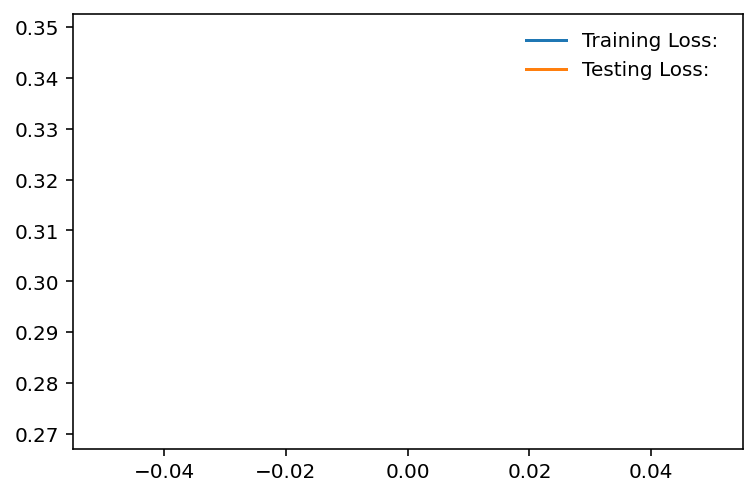

In [15]:
plt.plot(train_losses, label='Training Loss: ')
plt.plot(test_losses, label='Testing Loss: ')
plt.legend(frameon=False)